In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as patches

from plotly.subplots import make_subplots

In [3]:
data = h5py.File('data/new.HDF', 'r')
data2 = h5py.File('data/FY3E_MERSI_GRAN_L1_20230407_2145_0250M_V0.HDF', 'r')

In [4]:
image = np.array(data['Data']['EV_250_Emissive_b6'])
image2 = np.array(data2['Data']['EV_250_Emissive_b6'])

In [6]:
image.shape

(20000, 6144)

In [29]:
x_offset, y_offset = 60, 40

area_1_cord = (14559, 2666)
area_2_cord = (14188, 2930)
area_3_cord = (10639, 4632)
area_4_cord = (14560, 2668)

areas_cords = [area_1_cord, area_2_cord, area_3_cord, area_4_cord]

area_1 = image[area_1_cord[0]: area_1_cord[0] + y_offset, area_1_cord[1]: area_1_cord[1] + x_offset]
area_2 = image[area_2_cord[0]: area_2_cord[0] + y_offset, area_2_cord[1]: area_2_cord[1] + x_offset]
area_3 = image[area_3_cord[0]: area_3_cord[0] + y_offset, area_3_cord[1]: area_3_cord[1] + x_offset]
area_4 = image[area_4_cord[0]: area_4_cord[0] + y_offset, area_4_cord[1]: area_4_cord[1] + x_offset]

areas = [area_1, area_2, area_3, area_4]

In [30]:
x_offset, y_offset = 150, 40

area_1_cord2 = (14559, 2666)
#area_2_cord2 = (14188, 2930)
#area_3_cord2 = (10639, 4632)
#area_4_cord2 = (14560, 2668)

#areas_cords2 = [area_1_cord2, area_2_cord2, area_3_cord2, area_4_cord2]

area_1_2 = image2[area_1_cord2[0]: area_1_cord2[0] + y_offset, area_1_cord2[1]: area_1_cord2[1] + x_offset]
#area_2_2 = image2[area_2_cord2[0]: area_2_cord2[0] + y_offset, area_2_cord2[1]: area_2_cord2[1] + x_offset]
#area_3_2 = image2[area_3_cord2[0]: area_3_cord2[0] + y_offset, area_3_cord2[1]: area_3_cord2[1] + x_offset]
#area_4_2 = image2[area_4_cord2[0]: area_4_cord2[0] + y_offset, area_4_cord2[1]: area_4_cord2[1] + x_offset]

areas2 = [area_1_2] #, area_2_2, area_3_2, area_4_2]

In [ ]:
fig, ax = plt.subplots(figsize = (20,15))
ax.imshow(image)

for area in areas_cords:
    ax.add_patch(patches.Rectangle(area[::-1], x_offset, y_offset, linewidth=0.3, edgecolor='r', facecolor='none'))
    
plt.savefig('image.png', dpi=500)

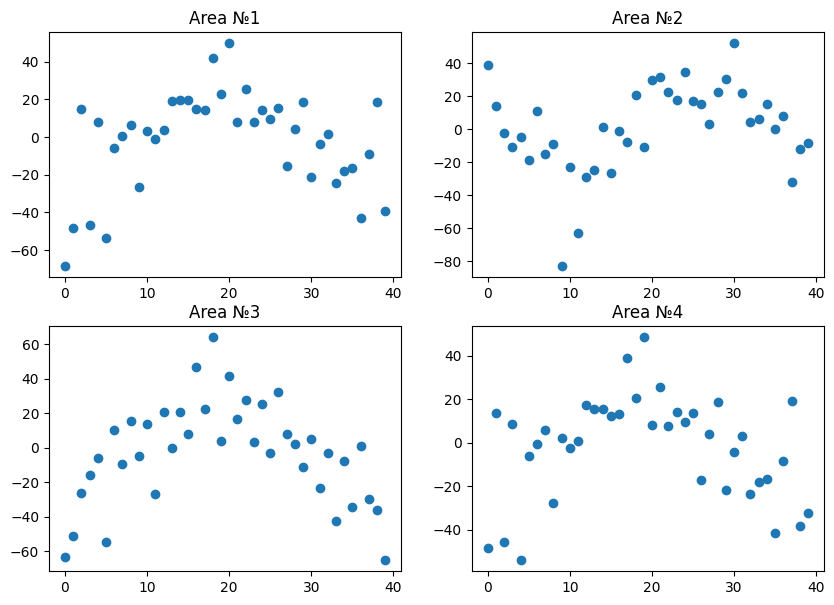

In [42]:
fig = plt.figure(figsize=(10, 7))
cmap = plt.cm.gray

rows = 2
columns = 2

for i, area in zip(range(1, columns + rows + 1), areas):
    fig.add_subplot(rows, columns, i)
    plt.scatter(np.arange(40), np.mean(area - np.median(area), axis=1))
    #plt.imshow(area, cmap=cmap)
    #plt.axis('off')
    plt.title(f"Area №{i}")

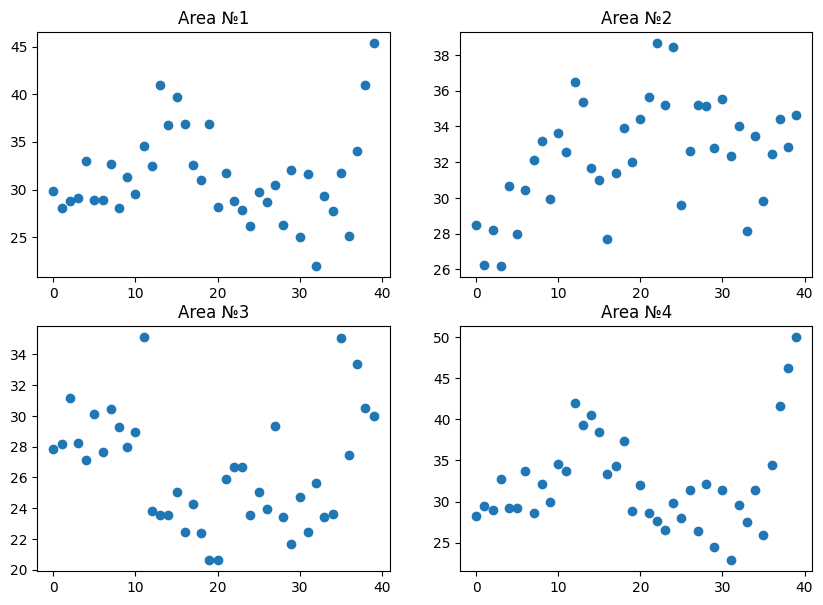

In [41]:
fig = plt.figure(figsize=(10, 7))
cmap = plt.cm.gray

rows = 2
columns = 2

for i, area in zip(range(1, columns + rows + 1), areas):
    fig.add_subplot(rows, columns, i)
    plt.scatter(np.arange(40), np.std(area, axis=1))
    #plt.imshow(area, cmap=cmap)
    #plt.axis('off')
    plt.title(f"Area №{i}")

In [43]:
for i in areas:
    print(np.mean(i))

5320.042916666666
5362.852916666667
7256.8983333333335
5320.218333333333


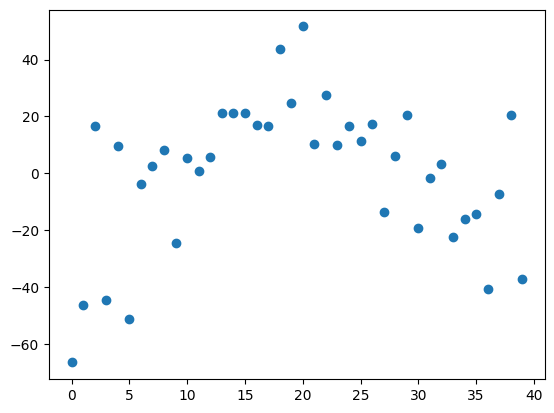

In [38]:
plt.scatter(np.arange(40), np.mean(area_1 - np.mean(area_1), axis=1))

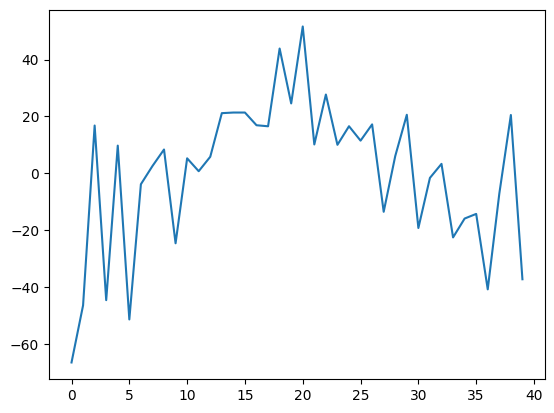

In [39]:
plt.plot(np.arange(40), np.mean(area_1 - np.mean(area_1), axis=1))

C:\Users\andre\AppData\Local\Temp\ipykernel_15688\740408763.py:9: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(area, cmap=cmap)


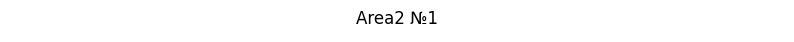

In [32]:
fig = plt.figure(figsize=(10, 7))
cmap = plt.cm.gray

rows = 1
columns = 1

for i, area in zip(range(1, columns + rows + 1), areas2):
    fig.add_subplot(rows, columns, i)
    plt.imshow(area, cmap=cmap)
    plt.axis('off')
    plt.title(f"Area2 №{i}")

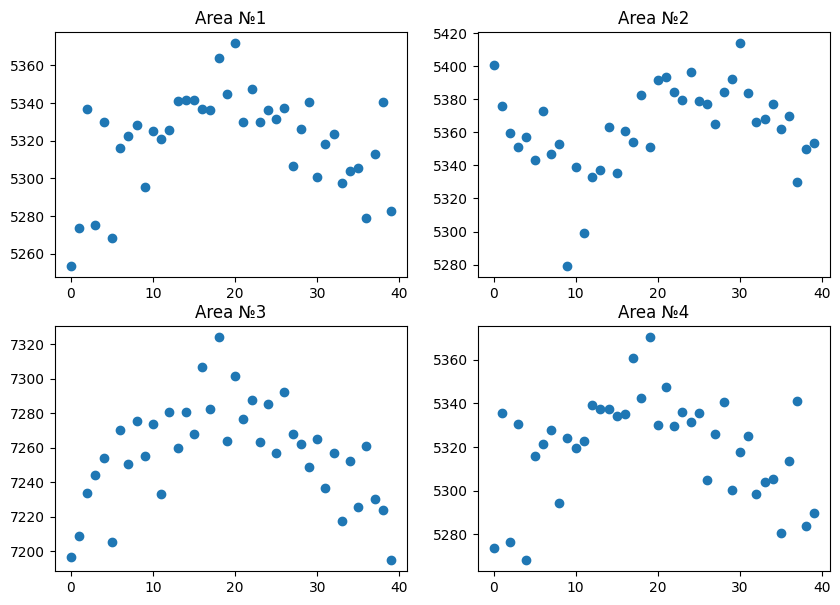

In [52]:
fig = plt.figure(figsize=(10, 7))

rows = 2
columns = 2

for i, area in zip(range(1, columns + rows + 1), areas):
    mean_by_row = np.mean(area, axis=1)
    fig.add_subplot(rows, columns, i)
    plt.scatter(np.arange(40), mean_by_row)
    plt.title(f"Area №{i}")

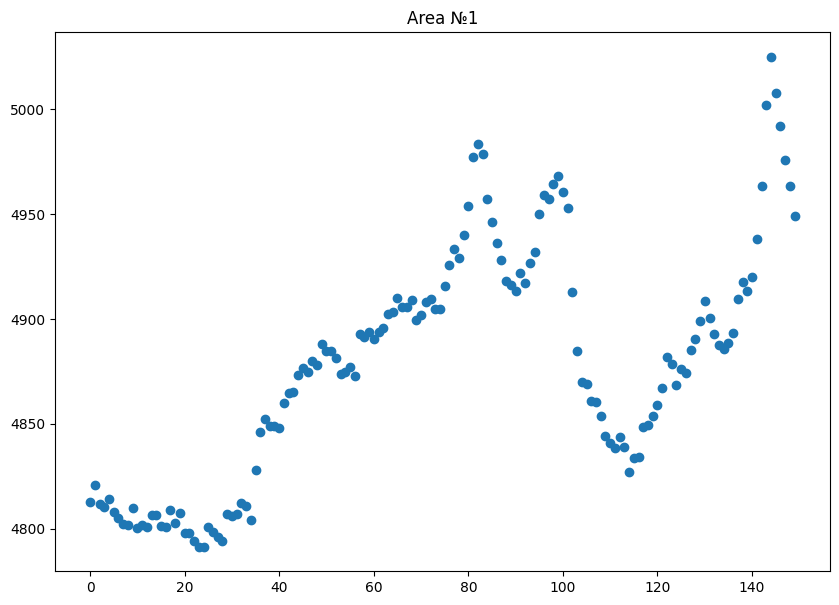

In [51]:
fig = plt.figure(figsize=(10, 7))

rows = 1
columns = 1

for i, area in zip(range(1, columns + rows + 1), areas2):
    mean_by_row = np.mean(area, axis=0)
    fig.add_subplot(rows, columns, i)
    plt.scatter(np.arange(150), mean_by_row)
    plt.title(f"Area №{i}")

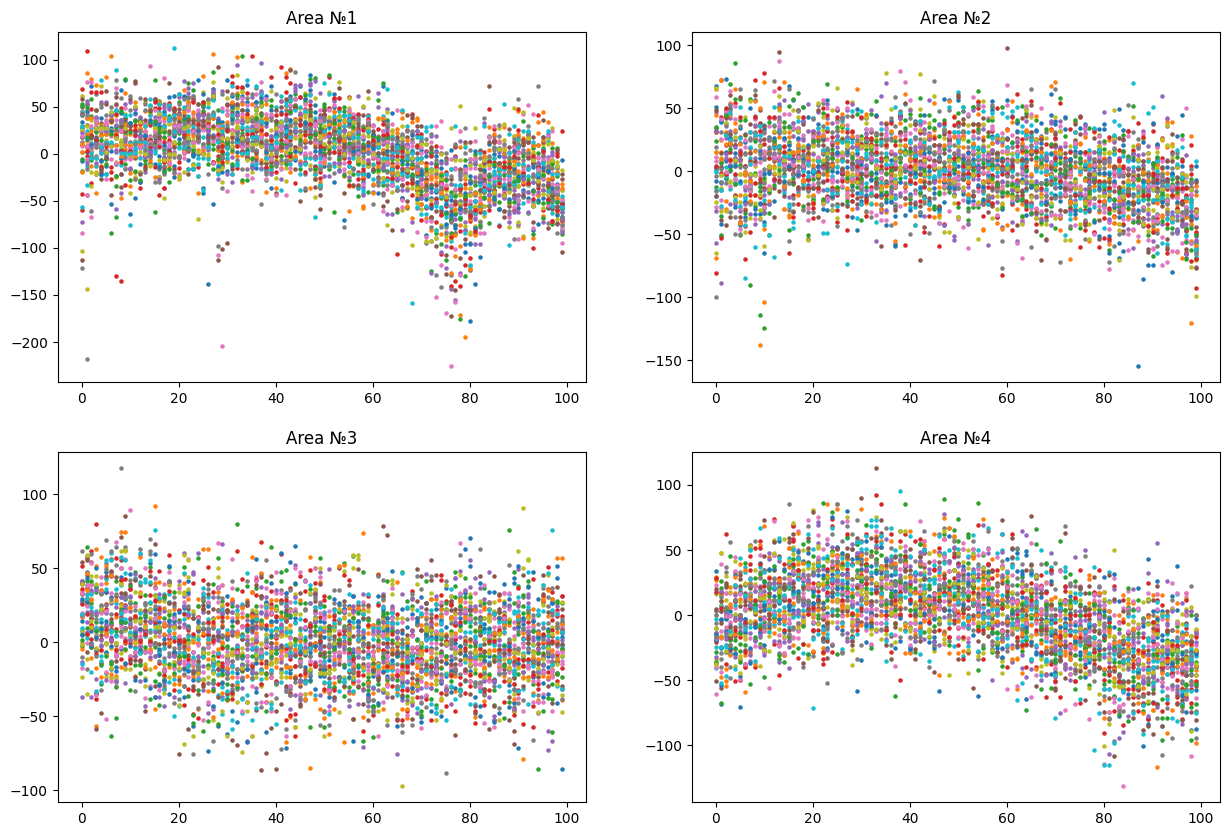

In [8]:
fig = plt.figure(figsize=(15, 10))

rows = 2
columns = 2

for i, area in zip(range(1, columns + rows + 1), areas):
    mean_by_row = np.mean(area, axis=1)
    mean_by_column = np.mean(area, axis=0)

    error = area - mean_by_row.reshape((mean_by_row.shape[0], 1))
    
    fig.add_subplot(rows, columns, i)
    
    for j in range(error.shape[0]):
        plt.scatter(np.arange(100), error[j], s=5)
    
    plt.title(f"Area №{i}")

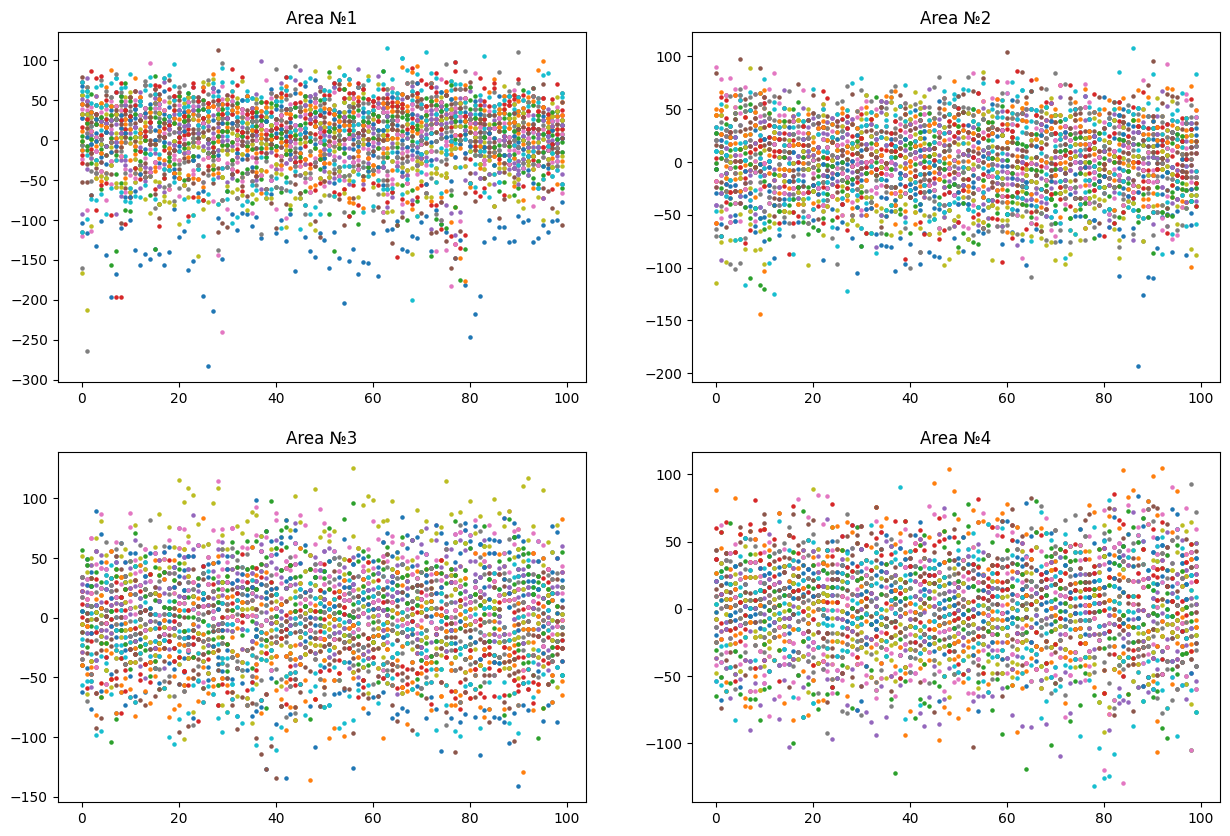

In [9]:
fig = plt.figure(figsize=(15, 10))

rows = 2
columns = 2

for i, area in zip(range(1, columns + rows + 1), areas):
    mean_by_column = np.mean(area, axis=0)

    error = area - mean_by_column
    
    fig.add_subplot(rows, columns, i)
    
    for j in range(error.shape[0]):
        plt.scatter(np.arange(100), error[j], s=5)
    
    plt.title(f"Area №{i}")

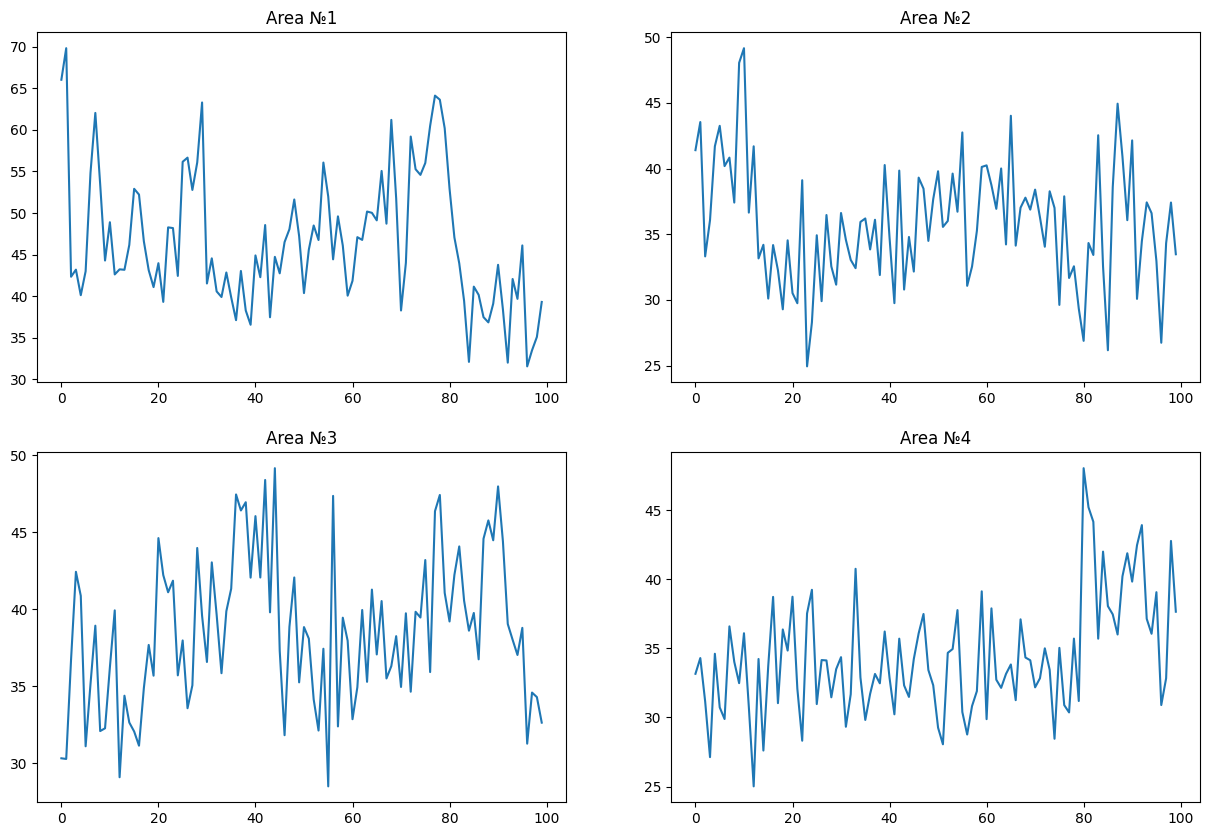

In [10]:
fig = plt.figure(figsize=(15, 10))

rows = 2
columns = 2

for i, area in zip(range(1, columns + rows + 1), areas):
    std_by_column = np.std(area, axis=0)
    
    fig.add_subplot(rows, columns, i)
    
    plt.plot(np.arange(100), std_by_column)
    
    plt.title(f"Area №{i}")

In [44]:
rows, columns = 2, 2
fig = make_subplots(rows=rows, cols=columns, start_cell="top-left",
                    subplot_titles=[f"Area №{i}" for i in range(1, len(areas) + 1)])

for i in range(rows):
    for j in range(columns):
        std_by_column = np.mean(areas[i + j], axis=0)
        fig.add_trace(go.Scatter(x=np.arange(100), y=std_by_column, mode='markers'), row=i+1, col=j+1)

fig.update_layout(title_text="Specs with Subplot Title")
fig.show()